# import libraries

In [1]:
import numpy as np
import pandas as pd
import pymysql
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from drive_and_win_bib import *

In [2]:
data = pd.read_csv('df_before.csv')


In [8]:
data
#trip_cleaned = data(index=range(segments[][1]+1, segments[i+1][0] ), inplace=False)

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,Vmoy,RPMMoy,VVAR,VRPM,Target
0,0.0,1.0,36.0,1250.0,0.0,49.0,15.3,0.059,2.035,9.434,...,9.953,40.018152,-8.639787,9.679846,77.007335,26.400000,16.560000,14.878769,801.079549,normal
1,0.0,1.0,14.0,1177.0,30.6,49.0,19.6,0.296,4.645,9.127,...,8.532,0.187987,-1.179926,25.742231,64.264780,29.800000,18.213000,8.586812,506.451281,normal
2,0.0,1.0,38.0,1874.0,54.9,49.0,24.3,-0.235,4.284,8.587,...,9.428,0.894614,-1.168556,20.333453,69.668054,34.100000,21.722000,13.843972,636.490342,normal
3,0.0,1.0,41.0,1974.0,0.0,48.0,16.1,0.144,1.352,9.972,...,9.457,0.423049,-7.021572,16.173462,72.328691,39.043021,27.589132,23.700492,1199.699402,normal
4,1.0,0.0,96.0,2684.0,58.8,39.0,21.2,-0.788,2.589,9.778,...,9.604,0.478168,-6.443571,17.581151,71.240252,90.300000,25.270000,2.451757,66.077396,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,0.0,1.0,48.0,2313.0,25.5,36.0,19.6,-0.424,9.902,0.558,...,0.870,1.651965,-2.876488,84.309505,4.949815,48.400000,23.443000,1.505545,62.252265,timid
1666,0.0,1.0,46.0,2214.0,20.0,36.0,18.0,-0.132,9.476,1.262,...,1.950,0.394200,-0.371728,78.630781,11.401043,40.100000,19.487000,5.195083,257.031797,timid
1667,0.0,1.0,15.0,1009.0,13.7,36.0,14.1,-0.755,9.575,1.175,...,0.282,56.649027,-1.080824,88.067362,1.647656,21.000000,14.275000,12.927146,426.662044,timid
1668,1.0,0.0,0.0,1418.0,28.2,37.0,14.9,-0.541,10.047,-0.690,...,0.406,2.995982,-1.793861,87.081287,2.349654,18.900000,15.973000,10.181137,429.658792,timid


### train test split

In [9]:
x = data.drop('Target', axis=1)
 
y = data['Target']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [10]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,Vmoy,RPMMoy,VVAR,VRPM
59,1.0,0.0,88.0,2455.0,54.5,35.0,25.1,-1.414,3.427,10.062,...,2.424,9.847,0.244737,-7.219167,13.723437,74.465272,89.1,24.929,1.663330,41.897892
720,1.0,0.0,105.0,2938.0,49.4,36.0,27.1,-0.499,3.080,9.249,...,2.733,9.138,2.826055,-5.803470,16.570179,72.425169,86.3,29.781,16.839438,239.456073
190,0.0,1.0,26.0,1290.0,0.0,35.0,14.9,-0.025,8.855,1.868,...,9.641,0.179,9.658027,8.357561,81.613490,1.052819,35.3,17.207,5.598611,264.278494
1634,0.0,1.0,0.0,1924.0,42.0,33.0,23.1,0.080,9.546,3.009,...,9.503,3.521,4.329037,-8.101609,68.208497,20.127359,23.0,17.254,11.095545,324.792652
1660,0.0,1.0,42.0,1998.0,6.7,35.0,15.3,-0.348,10.005,1.500,...,9.241,-0.274,1.916292,-10.093475,79.804025,-1.672786,44.8,21.748,5.287301,242.416904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,0.0,1.0,14.0,836.0,18.0,39.0,13.7,-0.983,8.969,2.906,...,9.432,2.612,10.794025,-2.762248,74.314018,15.467102,16.3,15.892,9.684466,469.464423
482,0.0,1.0,16.0,1290.0,9.8,44.0,14.9,1.163,9.668,2.392,...,9.294,2.300,0.432075,3.956978,75.590993,13.871903,23.3,18.558,4.738729,378.231205
1337,0.0,1.0,0.0,181.0,0.0,49.0,16.5,-0.029,3.268,9.138,...,3.287,8.401,19.099237,2.584308,21.354810,68.512067,34.0,23.149,22.803509,1319.916449
1278,0.0,1.0,46.0,2245.0,27.8,29.0,23.5,-0.232,9.629,2.761,...,9.502,1.512,0.770443,-4.204370,80.070854,9.020652,58.4,26.409,7.229569,416.656120


### Start classification

#### Standarization

In [11]:
ss=StandardScaler()
ss.fit(x_train)
xtrain_scaled = ss.transform(x_train)
xtest_scaled = ss.transform(x_test)

In [12]:
xtest_scaled

array([[ 1.2992801 , -1.2992801 ,  0.24946901, ...,  0.06472311,
        -0.79763216, -0.97406978],
       [-0.76965698,  0.76965698, -0.83394042, ..., -0.5700586 ,
        -0.19000518,  0.76152166],
       [-0.76965698,  0.76965698, -0.26037072, ..., -0.19232254,
        -1.15182495, -1.32238429],
       ...,
       [-0.76965698,  0.76965698, -0.16477577, ..., -0.47553558,
        -0.05797834, -0.4803049 ],
       [-0.76965698,  0.76965698, -0.41969564, ..., -0.4534624 ,
        -0.94709227, -1.06058668],
       [-0.76965698,  0.76965698, -0.22850574, ..., -0.43583947,
        -0.57692721, -0.57466589]])

#### KNN classification

0.7275449101796407
[[104   2  23   0]
 [ 13  82   3   8]
 [ 10   0  52   0]
 [ 11  16   5   5]]


C:\Users\AMIRA\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['normal', 'dangerous', 'timid', 'agressif'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-13-0760a878bed2>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-13-0760a878bed2>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


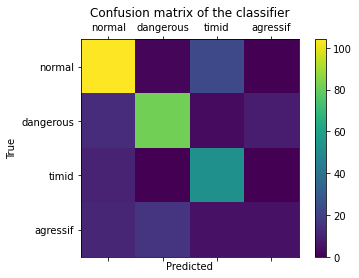

In [13]:
import pickle
pred_knn = 0
knn_0= KNeighborsClassifier(n_neighbors=1)


model_knn = knn_0.fit(xtrain_scaled,y_train)

pred_knn=model_knn.predict(xtest_scaled)
acc=accuracy_score(pred_knn,y_test)

print(acc)
#print('la matrice de confusion est \n', confusion_matrix(y_test,pred_knn))
labels = ['normal', 'dangerous', 'timid', 'agressif']
cm = confusion_matrix(y_test, pred_knn, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

filename = 'KNN_1_model.sav'
pickle.dump(knn_0, open(filename, 'wb'))
 
#loaded_model = pickle.load(open(filename, 'rb'))

0.7485029940119761
[[113  15   0   1]
 [ 15  47   0   0]
 [ 17   0   6  14]
 [ 12   3   7  84]]


C:\Users\AMIRA\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['normal', 'timid', 'agressif', 'dangerous'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-14-5211ed2c0801>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-14-5211ed2c0801>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


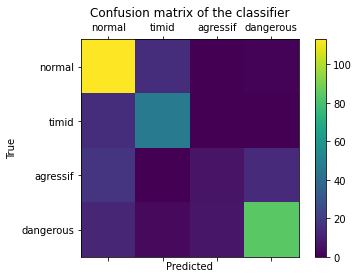

In [14]:
pred_knn = 0
knn_4= KNeighborsClassifier(n_neighbors=4)

model_knn = knn_4.fit(xtrain_scaled,y_train)
pred_knn=model_knn.predict(xtest_scaled)
acc=accuracy_score(pred_knn,y_test)
print(acc)

#print('la matrice de confusion est \n', confusion_matrix(y_test,pred_knn))

labels = ['normal', 'timid', 'agressif', 'dangerous']
cm = confusion_matrix(y_test, pred_knn, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
filename = 'KNN_4_model.sav'
pickle.dump(knn_4, open(filename, 'wb'))

#### Support Vector Machine Classification

0.7634730538922155
[[124   2   3   0]
 [  8  95   0   3]
 [ 31   0  31   0]
 [  4  28   0   5]]


C:\Users\AMIRA\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['normal', 'dangerous', 'timid', 'agressif'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-15-3a72fdd00d87>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-15-3a72fdd00d87>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


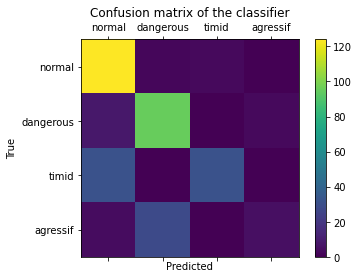

In [15]:
svc=SVC(kernel='rbf',probability=True)
model_svc=svc.fit(xtrain_scaled,y_train)
pred_svc=model_svc.predict(xtest_scaled)
acc=accuracy_score(pred_svc,y_test)
print(acc)

labels = ['normal', 'dangerous', 'timid', 'agressif']
#labels =['normal', 'timid', 'agressif', 'dangerous']
cm = confusion_matrix(y_test, pred_svc, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

##### saving support vector machine model (best performance)

In [16]:
import pickle
filename = 'svm_model.h5'
pickle.dump(model_svc, open(filename, 'wb'))

#### Logistic regression Classification

0.7604790419161677
[[114  12   1   2]
 [ 23  39   0   0]
 [  2   0  10  25]
 [  5   1   9  91]]


C:\Users\AMIRA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\AMIRA\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['normal', 'timid', 'agressif', 'dangerous'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-17-c1ae95901c07>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-17-c1ae95901c07>:2

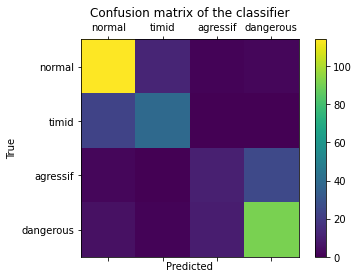

In [17]:

LR=LogisticRegression()
model_LR=LR.fit(xtrain_scaled,y_train)
pred_LR=model_LR.predict(xtest_scaled)

acc=accuracy_score(pred_LR,y_test)

print(acc)
#labels=list()
#labels = y_test.unique()
labels = ['normal', 'timid', 'agressif', 'dangerous']
cm = confusion_matrix(y_test, pred_LR, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# save the model to disk
filename = 'LR_model.sav'
pickle.dump(model_LR, open(filename, 'wb'))
 
#loaded_model = pickle.load(open(filename, 'rb'))
            

0.718562874251497
[[102   8  17   2]
 [ 11  81   1  13]
 [ 26   1  35   0]
 [  8   7   0  22]]


C:\Users\AMIRA\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['normal', 'dangerous', 'timid', 'agressif'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-18-e52356b09f96>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-18-e52356b09f96>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


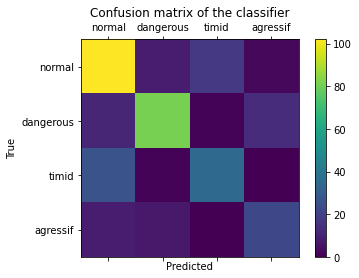

In [18]:
DT=DecisionTreeClassifier()
model_DT=DT.fit(xtrain_scaled,y_train)
pred_DT=model_DT.predict(xtest_scaled)

acc=accuracy_score(pred_DT,y_test)

print(acc)
labels = ['normal', 'dangerous', 'timid', 'agressif']
cm = confusion_matrix(y_test, pred_DT, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)

# save the model to disk
filename = 'DT_model.sav'
pickle.dump(DT, open(filename, 'wb'))
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

0.8143712574850299
[[126   1   2   0]
 [  5 100   0   1]
 [ 24   0  38   0]
 [  6  23   0   8]]


C:\Users\AMIRA\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['normal', 'dangerous', 'timid', 'agressif'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
<ipython-input-19-cf370d61df29>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-19-cf370d61df29>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


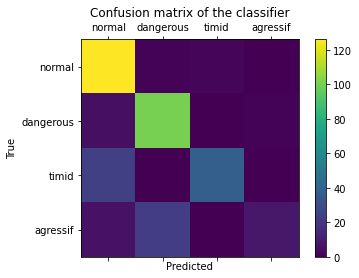

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(xtrain_scaled,y_train)
rf_pred= rf_model.predict(xtest_scaled)
importance = rf_model.feature_importances_
print(accuracy_score(y_test,rf_pred, normalize = True))
# save the model to disk
filename = 'RF_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))
acc=accuracy_score(pred_DT,y_test)

labels = ['normal', 'dangerous', 'timid', 'agressif']
cm = confusion_matrix(y_test, rf_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)


cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [20]:
rf_model

RandomForestClassifier(n_estimators=500)

In [21]:
def extract_features (x,y,dataset,window_size,number_of_features=16,excluded=[]):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3 ,random_state = 10)
    classifier = RandomForestClassifier(n_estimators=500)
    classifier = classifier.fit(X_train,y_train)
    pred = classifier.predict(X_test)
    print("RandomForestClassifier accuracy : ",
      accuracy_score(y_test, pred, normalize = True))
    print(classification_report(y_test,pred))
    importances= classifier.feature_importances_
    ind = dataset.dtypes.index[:(dataset.shape[1]-len(excluded))]
    feature_table = []
    for i in range(0,(dataset.shape[1]-len(excluded))):
        one_feature = importances[i*window_size:(i+1)*window_size].mean()
        feature_table.append(one_feature*window_size)
    f,indec= pd.DataFrame(feature_table),pd.DataFrame(ind)
    feature_role = pd.concat([f,indec],axis=1)
    feature_role=feature_role.set_axis(['importance','feature name'],axis='columns',inplace=False)
    feature_rank= feature_role.sort_values('importance')[::-1]
    feature_rank= feature_rank.reset_index(drop=True)
    return feature_rank[:number_of_features]

In [22]:
from sklearn.metrics import classification_report
extract_features(x,y,data,10,number_of_features=20,excluded=['Target'])

RandomForestClassifier accuracy :  0.8023952095808383
              precision    recall  f1-score   support

    agressif       0.86      0.11      0.19        56
   dangerous       0.80      0.95      0.87       153
      normal       0.76      0.98      0.86       190
       timid       0.97      0.62      0.75       102

    accuracy                           0.80       501
   macro avg       0.85      0.67      0.67       501
weighted avg       0.83      0.80      0.77       501



<ipython-input-21-c4902a0abbee>:13: RuntimeWarning: Mean of empty slice.
  one_feature = importances[i*window_size:(i+1)*window_size].mean()
C:\Users\AMIRA\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,importance,feature name
0,NaN,VRPM
1,NaN,VVAR
2,NaN,RPMMoy
3,NaN,Vmoy
4,NaN,139
5,NaN,138
6,NaN,137
7,NaN,136
8,NaN,135
9,NaN,134
